# EDA of Videos

### Segment 1: Loading and Initial Exploration

This segment loads the dataset, displays the header, and provides basic information about data types, missing values, and descriptive statistics.

In [73]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from prettytable import PrettyTable
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('pinoybaiting_videos_dataset.csv')

# Display the header and first 10 rows of data in a basic table format
df.head(5)


,videoId,Publish Date,channelId,Video Title,Video Description,Channel Title,Video Tags,Default Audio Language,Video Views,Video Likes,Favorite Count,Comment Count,Channel Country,Query
0,eUouFmegReQ,2017-01-27T03:36:04Z,UCCgVh36x3hbuRnHMpwl443Q,Roland 'Bunot' Abante - To Love Somebody (Mich...,Watch the 'Roland 'Bunot' Abante - To Love Som...,Music Game News,"['mgn', 'trailers', 'reaction', 'ovela', 'revi...",en,1054335,15747,0,961,CA,"American React Filipino,React to Filipinos,Rea..."
1,KHYVLlfrlhQ,2017-01-29T20:17:39Z,UCCgVh36x3hbuRnHMpwl443Q,Marcelito Pomoy - Power of Love (Celine Dion) ...,Watch the 'Marcelito Pomoy - Power of Love' co...,Music Game News,"['mgn', 'trailers', 'reaction', 'ovela', 'revi...",en,1104991,16925,0,715,CA,"American React Filipino,React to Filipinos,Rea..."
2,S7h1GJ6Zuvk,2017-01-27T03:01:26Z,UCCgVh36x3hbuRnHMpwl443Q,Xia Vigor as Taylor Swift (Your Face Sounds Fa...,Watch the Xia Vigor as Taylor Swift performanc...,Music Game News,"['mgn', 'trailers', 'reaction', 'ovela', 'revi...",en,746447,10562,0,615,CA,"American React Filipino,Foreigner React Filipi..."
3,CKIXGJtS36c,2017-01-28T16:33:59Z,UCCgVh36x3hbuRnHMpwl443Q,Jessica Sanchez & Joshua Ledet - I Knew You We...,Watch the 'Jessica Sanchez & Joshua Ledet - I ...,Music Game News,"['mgn', 'trailers', 'reaction', 'ovela', 'revi...",en,80202,1222,0,182,CA,"American React Filipino,React to Filipinos,Rea..."
4,hFUzhd-R6GQ,2017-01-21T14:44:59Z,UCCgVh36x3hbuRnHMpwl443Q,Lea Salonga VS Ruthie Henshall - I Dream A Dre...,Discuss the 'Lea Salonga VS Ruthie Henshall - ...,Music Game News,"['mgn', 'trailers', 'reaction', 'ovela', 'revi...",en,61669,832,0,560,CA,"American React Filipino,React to Pinoy"


In [75]:
# Display data types and missing values
df.info()

# Display descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42285 entries, 0 to 42284
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   videoId                 42285 non-null  object
 1   Publish Date            42285 non-null  object
 2   channelId               42285 non-null  object
 3   Video Title             42285 non-null  object
 4   Video Description       40181 non-null  object
 5   Channel Title           42285 non-null  object
 6   Video Tags              42285 non-null  object
 7   Default Audio Language  42285 non-null  object
 8   Video Views             42285 non-null  int64 
 9   Video Likes             42285 non-null  int64 
 10  Favorite Count          42285 non-null  int64 
 11  Comment Count           42285 non-null  int64 
 12  Channel Country         42285 non-null  object
 13  Query                   42285 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.5+ MB


,Video Views,Video Likes,Favorite Count,Comment Count
count,4.228500e+04,42285.000000,42285.0,42285.000000
mean,1.087470e+05,3140.130543,0.0,274.348516
std,4.639769e+05,13325.062904,0.0,1120.403259
min,0.000000e+00,0.000000,0.0,0.000000
25%,1.299000e+03,43.000000,0.0,14.000000
50%,9.322000e+03,332.000000,0.0,60.000000
75%,5.473500e+04,1974.000000,0.0,219.000000
max,1.681187e+07,472498.000000,0.0,116302.000000


Based on the statistics provided for the dataset:

- **Number of Entries**: The dataset contains 42,285 entries.
- **Data Types**: Most columns are of object type, indicating text or categorical data, while some columns are of integer type, representing numerical data.
- **Missing Values**: The "Video Description" column has some missing values, as indicated by the difference in the counts between that column and the others.
- **Numerical Statistics**:
  - **Video Views**: The mean number of views for videos is approximately 108,747, with a wide range from 0 to over 16 million. The distribution appears to be positively skewed, as the median (50th percentile) is much lower than the mean.
  - **Video Likes**: The mean number of likes for videos is approximately 3,140, with a wide range from 0 to over 472,000. Similar to views, the distribution appears to be positively skewed.
  - **Favorite Count**: All values in this column seem to be 0, as indicated by the standard deviation of 0. This suggests that this feature may not provide useful information for analysis.
  - **Comment Count**: The mean number of comments is approximately 274, with a wide range from 0 to over 116,000. Similar to views and likes, the distribution appears to be positively skewed.

### Segment 2: Text Data Exploration

This part focuses on exploring text data, calculating lengths of video titles and descriptions, and visualizing the distribution of default audio languages.

The provided code segment accomplishes the following:

1. Calculates the lengths of video titles and descriptions and adds them as new columns in the DataFrame.
2. Displays descriptive statistics for the lengths of video titles and descriptions.
3. Creates a bar plot to visualize the distribution of default audio languages used in the videos.

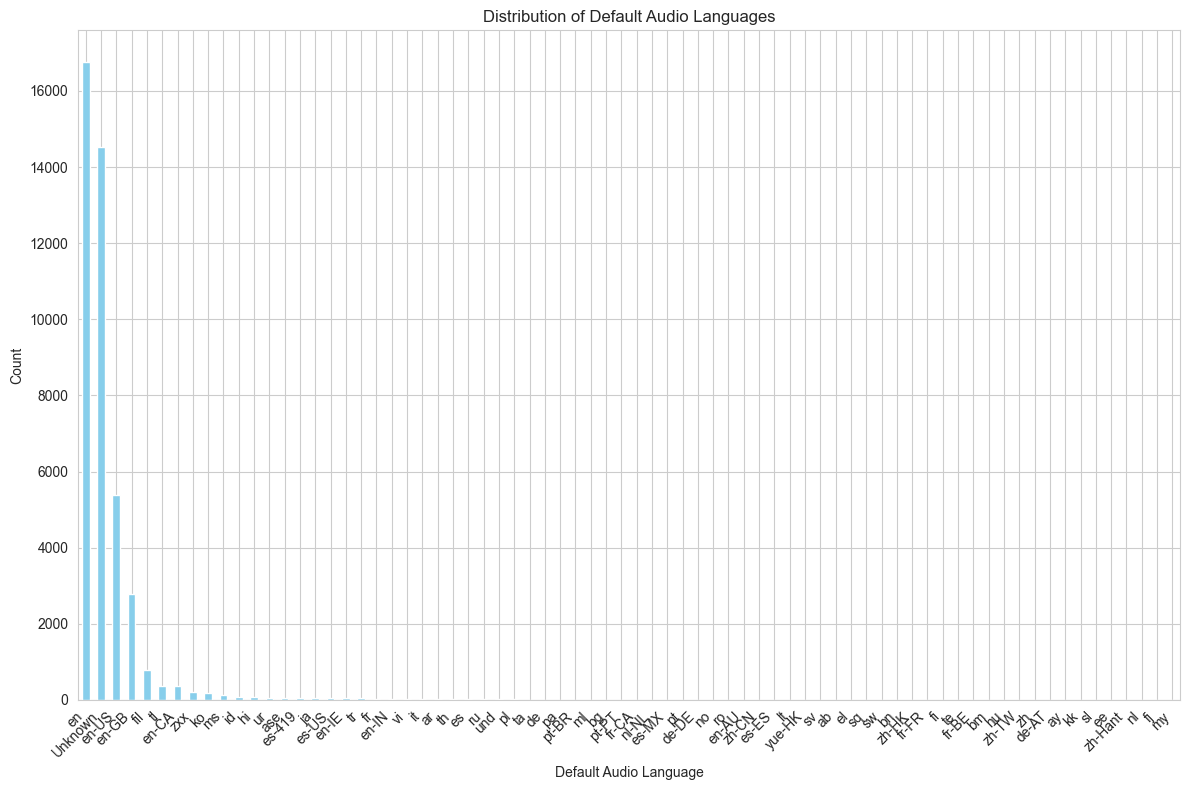

In [76]:
# Explore video titles and descriptions
df['Video Title Length'] = df['Video Title'].apply(lambda x: len(str(x)) if pd.notnull(x) and not isinstance(x, float) else 0)
df['Video Description Length'] = df['Video Description'].apply(lambda x: len(str(x)) if pd.notnull(x) and not isinstance(x, float) else 0)

# Display statistics on text lengths
df[['Video Title Length', 'Video Description Length']].describe()

# Barplot of default audio languages using matplotlib
plt.figure(figsize=(12, 8))  # Increase the size of the figure
ax = df['Default Audio Language'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Default Audio Languages')
plt.xlabel('Default Audio Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [77]:
# Display distribution of default audio languages
audio_language_distribution = df['Default Audio Language'].value_counts().reset_index()
audio_language_distribution.columns = ['Default Audio Language', 'Count']

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ['Default Audio Language', 'Count']

# Add data to the table
for index, row in audio_language_distribution.iterrows():
    table.add_row([row['Default Audio Language'], row['Count']])

# Print the table
print("\nDistribution of Default Audio Languages:")
print(table)


Distribution of Default Audio Languages:
+------------------------+-------+
| Default Audio Language | Count |
+------------------------+-------+
|           en           | 16753 |
|        Unknown         | 14534 |
|         en-US          |  5375 |
|         en-GB          |  2778 |
|          fil           |  787  |
|           tl           |  376  |
|         en-CA          |  363  |
|          zxx           |  204  |
|           ko           |  187  |
|           ms           |  122  |
|           id           |   86  |
|           hi           |   66  |
|           ur           |   49  |
|          ase           |   49  |
|         es-419         |   43  |
|           ja           |   42  |
|         es-US          |   40  |
|         en-IE          |   39  |
|           tr           |   39  |
|           fr           |   33  |
|         en-IN          |   32  |
|           vi           |   32  |
|           it           |   20  |
|           ar           |   19  |
|           t

The distribution of default audio languages in the dataset indicates the prevalence of various languages among the videos. Here are some observations:

- `English` (en) is the most common default audio language, with a count of 16,753.
- `Unknown` language is present in a significant number of videos, with 14,534 instances. This could indicate missing or unspecified language information.
- Variants of English, such as `en-US` (5,375) and `en-GB` (2,778), are also prevalent.
- `Filipino` (fil) and `Tagalog` (tl) languages have substantial representation, with 787 and 376 counts, respectively.
- Other languages appear less frequently, with counts ranging from a single occurrence to a few dozen.
  
Overall, the dataset reflects a diverse linguistic landscape, with English being the dominant language, followed by other languages such as Filipino, Tagalog, and various regional dialects. 

### Segment 3: Channel-wise Metrics and Temporal Analysis

This segment calculates average views, likes, and comments per channel, displays top channels by average views, and explores temporal trends by visualizing the number of videos published per month.

In [78]:
# Calculate average views per channel
channel_metrics = df.groupby('Channel Title')['Video Views'].mean().sort_values(ascending=False).head(10)

# Create a PrettyTable
table = PrettyTable(['Channel Title', 'Average Views'])
for channel, views in channel_metrics.items():
    table.add_row([channel, f'{views:,.1f}'])

# Print the table
print("Top Channels by Average Views:")
print(table)

Top Channels by Average Views:
+---------------------------------+---------------+
|          Channel Title          | Average Views |
+---------------------------------+---------------+
|              Domics             |  14,626,169.0 |
|           MANILA GREY           |  7,068,484.0  |
|            Joe HaTTab           |  6,834,980.5  |
|    Best Ever Food Review Show   |  6,447,555.4  |
|             CookieZ             |  5,959,365.0  |
| More Best Ever Food Review Show |  5,826,434.3  |
|           The Try Guys          |  5,653,886.3  |
|      Masterpiece of Voices      |  5,627,763.0  |
|           Aida Coleman          |  5,258,839.0  |
|           Milana Coco           |  5,212,199.5  |
+---------------------------------+---------------+


This table provides insights into the top channels based on their average views per video. Here are some observations:

- **Domics** stands out as the channel with the highest average views per video, with an impressive average of 14,626,169 views.
- **MANILA GREY** follows closely behind with an average of 7,068,484 views per video, indicating a strong viewership for this channel as well.
- **Joe HaTTab** and **Best Ever Food Review Show** have similar average views, with approximately 6.8 million and 6.4 million views per video, respectively.
- **CookieZ** and **More Best Ever Food Review Show** also have notable average views, both exceeding 5.9 million views per video.
- **The Try Guys**, **Masterpiece of Voices**, **Aida Coleman**, and **Milana Coco** round out the top channels, each with average views ranging from approximately 5.2 million to 5.6 million views per video.

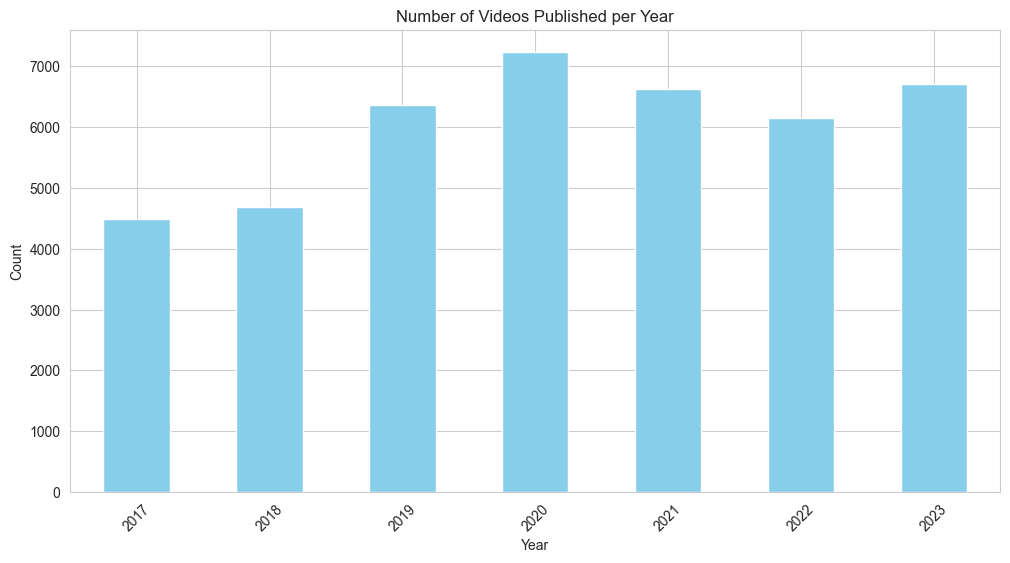

In [79]:
# Convert 'Publish Date' to datetime format
df['Publish Date'] = pd.to_datetime(df['Publish Date'])

# Extract year from the 'Publish Date' column
df['Year'] = df['Publish Date'].dt.year

# Count the number of videos published per year
year_counts = df['Year'].value_counts().sort_index()

# Barplot of videos published per year using matplotlib
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Videos Published per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [80]:
# Convert 'Publish Date' to datetime format
df['Publish Date'] = pd.to_datetime(df['Publish Date'])

# Extract year from the 'Publish Date' column
df['Year'] = df['Publish Date'].dt.year

# Count the number of videos published per year
year_counts = df['Year'].value_counts().sort_index()

# Create a PrettyTable
table = PrettyTable(["Year", "Number of Videos Published"])
for year, count in year_counts.items():
    table.add_row([year, count])

print(table)

+------+----------------------------+
| Year | Number of Videos Published |
+------+----------------------------+
| 2017 |            4490            |
| 2018 |            4685            |
| 2019 |            6372            |
| 2020 |            7240            |
| 2021 |            6624            |
| 2022 |            6159            |
| 2023 |            6715            |
+------+----------------------------+


From the provided table showing the number of videos published per year, it appears that there has been a steady increase in the number of videos published over the years, with the highest number of videos published in 2020 (7240 videos) and 2023 (6715 videos). This increase in video production could potentially lead to an increase in instances of pinoybaiting, as more content creators may resort to sensational or provocative content to attract viewership.

In [81]:
# Print Channel Country Statistics
print("Channel Country Statistics")
channel_country_stats = df['Channel Country'].value_counts().head(20)  # Get only the top 20 countries
channel_country_table = PrettyTable(['Channel Country', 'Count'])
for country, count in channel_country_stats.items():
    channel_country_table.add_row([country, count])
print(channel_country_table)
print("\n")

Channel Country Statistics
+-----------------+-------+
| Channel Country | Count |
+-----------------+-------+
|        US       | 19331 |
|        GB       |  5347 |
|        CA       |  3604 |
|        AU       |  2324 |
|        KR       |  1367 |
|        DE       |  908  |
|        JP       |  899  |
|        NL       |  815  |
|        IN       |  712  |
|        AE       |  684  |
|        SG       |  521  |
|        MY       |  376  |
|        NZ       |  311  |
|        FR       |  299  |
|        NO       |  280  |
|        TH       |  279  |
|        ID       |  258  |
|        DO       |  256  |
|        ES       |  248  |
|        IT       |  244  |
+-----------------+-------+




The table provides statistics on the distribution of YouTube channels by country. It appears that the majority of channels in the dataset are from the United States (US), with a count of 19,331 channels. Following the US, the countries with the next highest counts of channels are the United Kingdom (GB) with 5,347 channels, Canada (CA) with 3,604 channels, and Australia (AU) with 2,324 channels.

This distribution suggests that a significant portion of the channels in the dataset are from English-speaking countries, which could impact the language and content themes prevalent in the videos. It's also worth noting the presence of channels from other countries like South Korea (KR), Germany (DE), Japan (JP), and the Netherlands (NL), indicating a diverse representation of creators from various regions.

Distribution of Top 20 Channel Countries


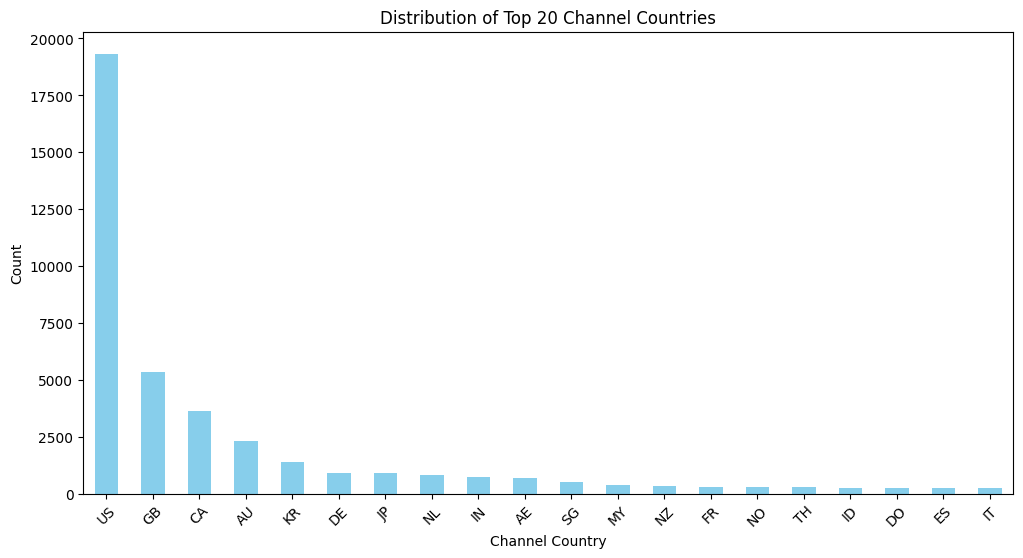

In [12]:
# Plot the distribution of the top 20 Channel Countries
print("Distribution of Top 20 Channel Countries")
plt.figure(figsize=(12, 6))
channel_country_stats.plot(kind='bar', color='skyblue')  # Plot only the top 20 countries
plt.title('Distribution of Top 20 Channel Countries')
plt.xlabel('Channel Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Segment 4: Topic Clustering (Based on Tags and Titles)

### Preprocessing

1. **Text Preprocessing Function**: Define a function (`preprocess_text`) to clean and tokenize the text data:
   - Removes special characters and digits using regular expressions.
   - Tokenizes the text into individual words using spaCy.
   - Lemmatizes the tokens to their base form and removes stopwords.
   - Joins the preprocessed tokens back into a single string.

2. **Applying Preprocessing Function**: Apply the `preprocess_text` function to both the 'Video Title' and 'Video Tags' columns of the DataFrame to prepare the text data for further analysis, such as topic clustering.

In [13]:
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer

# Load the English language model for spaCy
nlp = spacy.load('en_core_web_sm')

# Load the dataset (replace 'pinoybaiting_videos_dataset.csv' with your dataset file)
df = pd.read_csv('pinoybaiting_videos_dataset.csv')

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text using spaCy
    doc = nlp(text)
    # Lemmatize the tokens and remove stopwords
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocessing function to the 'Video Title' and 'Video Tags' columns
df['Video Title'] = df['Video Title'].apply(preprocess_text)
df['Video Tags'] = df['Video Tags'].apply(preprocess_text)

In [14]:
# Combine tags and titles into a single text column
df['Combined Text'] = df['Video Tags'] + ' ' + df['Video Title']

# Tokenize and preprocess the combined text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Combined Text'])


### Model training

1. **Applying Latent Dirichlet Allocation (LDA)**:
   - LDA is a probabilistic model used for topic modeling.
   - The `LatentDirichletAllocation` function from scikit-learn is used to perform LDA.
   - The number of components (topics) is set to 5, and a random seed is specified for reproducibility.

2. **Fitting LDA Model**:
   - The LDA model is trained on the input data (`X`), which typically represents the preprocessed text data (e.g., titles and tags).
   - The `fit_transform` method is used to transform the input data into topic distributions.

In [15]:
# Apply LDA for topic modeling
best_lda_model = None
best_lda_score = float("-inf")
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_lda = lda.fit_transform(X)
score = lda.score(X)
best_lda_score = score
best_lda_model = lda

3. **Determining the Best LDA Model**:
   - The model with the highest log-likelihood score is selected as the best LDA model.
   - The log-likelihood score indicates how well the model explains the observed data.

4. **Assigning Clusters**:
   - The dominant topic for each video is determined by finding the index of the maximum value in the topic distributions (`X_lda.argmax(axis=1)`).
   - A new column named 'Cluster' is created in the DataFrame to store the assigned clusters.

5. **Displaying LDA Topics**:
   - The top words associated with each LDA topic are extracted and printed.
   - Each topic consists of the words most likely to appear together based on the LDA model.

6. **Displaying Clustered LDA Topics**:
   - For each cluster, the corresponding LDA topic label and top words are displayed.
   - This helps interpret the topics learned by the LDA model within the context of the assigned clusters.

In [16]:
# Check if LDA model is found
if best_lda_model:
    # Create the 'Cluster' column based on LDA topic distributions
    df['Cluster'] = X_lda.argmax(axis=1)
    X_lda = best_lda_model.transform(X)
    
    # Display LDA topics
    print("LDA Topics:")
    print("-----------------------------")
    lda_topics = {}
    for i, topic in enumerate(best_lda_model.components_, start=1):
        top_words_idx = topic.argsort()[:-10-1:-1]  # Display top 10 words for each topic
        top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
        lda_topics[f"Topic {i}"] = ', '.join(top_words)
        print(f"Topic {i}: {', '.join(top_words)}")
    print("\n")

    # Display clusters and their corresponding LDA topics
    print("Clustered LDA Topics:")
    print("------------------------------------------------")
    for cluster in range(X_lda.shape[1]):
        cluster_videos = df[df['Cluster'] == cluster]
        lda_topic_label = f"Topic {cluster + 1}"
        lda_topic_words = lda_topics.get(lda_topic_label, "Unknown")
        print(f"Cluster {cluster + 1} (LDA Topic: {lda_topic_label}): {lda_topic_words}")
        print("\n")
else:
    print("LDA model not found.")

LDA Topics:
-----------------------------
Topic 1: filipino, jollibee, couple, tagalog, philippines, try, snack, challenge, el, reaction
Topic 2: filipino, food, try, pinoy, mukbang, recipe, vlog, eat, street, family
Topic 3: philippines, philippine, travel, vlog, manila, filipina, foreigner, filipino, city, cebu
Topic 4: reaction, react, filipino, sb, wish, philippines, video, music, morissette, singer
Topic 5: filipino, japan, canada, vlog, pinoy, japanese, family, singapore, asian, vlogger


Clustered LDA Topics:
------------------------------------------------
Cluster 1 (LDA Topic: Topic 1): filipino, jollibee, couple, tagalog, philippines, try, snack, challenge, el, reaction


Cluster 2 (LDA Topic: Topic 2): filipino, food, try, pinoy, mukbang, recipe, vlog, eat, street, family


Cluster 3 (LDA Topic: Topic 3): philippines, philippine, travel, vlog, manila, filipina, foreigner, filipino, city, cebu


Cluster 4 (LDA Topic: Topic 4): reaction, react, filipino, sb, wish, philippines,

Based on the clustered LDA topics and the labels assigned to them, here's how each cluster could be interpreted:

1. **Cluster 1 (Cultural and Food Challenges)**:
   - This cluster likely focuses on challenges related to Filipino culture and food. It includes words like "jollibee," "tagalog," and "snack," suggesting content centered around trying Filipino snacks or food challenges.

2. **Cluster 2 (Food and Family Vlogs)**:
   - This cluster appears to revolve around Filipino food, family, and vlogging. It includes terms like "mukbang," "recipe," and "family," indicating videos showcasing Filipino cuisine and family-related content.

3. **Cluster 3 (Travel and Lifestyle)**:
   - This cluster likely features travel and lifestyle content related to the Philippines. It includes words such as "philippines," "travel," and "manila," suggesting videos about travel experiences, life in the Philippines, and exploring Filipino cities.

4. **Cluster 4 (Music and Reactions)**:
   - This cluster seems to focus on reactions to music and other content. It includes terms like "reaction," "react," and "music," indicating videos featuring reactions to music performances, entertainment, or cultural events.

5. **Cluster 5 (Overseas Filipino Life)**:
   - This cluster likely pertains to the experiences of overseas Filipinos living abroad. It includes words such as "japan," "canada," and "singapore," suggesting content about the lives of Filipinos living outside the Philippines, their experiences, challenges, and interactions with other cultures.

These interpretations align well with the assigned labels and provide insights into the thematic content of each cluster.

In [17]:
df.to_csv('pinoybaiting_videos_dataset_clustered.csv', index=False)

# EDA of Comments

### Data Loading and Merging

Combine category prediction chunks 1-50

In [11]:
import pandas as pd

# Initialize an empty DataFrame to store the aggregated category predictions
all_category_predictions = pd.DataFrame()

# Load each category_predictions_n.csv file and concatenate them
for i in range(1, 51):
    file_path = f'predictions/category_predictions_{i}.csv'
    temp_df = pd.read_csv(file_path)
    all_category_predictions = pd.concat([all_category_predictions, temp_df], ignore_index=True)

Save dataframes into csv files

In [27]:
all_category_predictions.to_csv('all_category_predictions_1-50.csv', index=False)

Load existing datasets for category predictions and clustered pinoybaiting videos

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from prettytable import PrettyTable
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

# Load the dataset
all_category_predictions = pd.read_csv('all_category_predictions_1-50.csv')
df = pd.read_csv('pinoybaiting_videos_dataset_clustered.csv')

c:\Users\Tinkle\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Merge category and clustered videos dataframes into one

In [2]:
# Merge the datasets on videoId
merged_data = pd.merge(all_category_predictions, df, on='videoId')

# Convert 'datePublished' to datetime format and extract year and quarter
merged_data['datePublished'] = pd.to_datetime(merged_data['datePublished'])
merged_data['year'] = merged_data['datePublished'].dt.year
merged_data['quarter'] = merged_data['datePublished'].dt.quarter

Merge polarity and clustered videos dataframes into one

In [86]:
# Merge the datasets on videoId
polarity_predictions_df = pd.read_csv('initial_polarity_predictions.csv')
merged_polarity_data = pd.merge(polarity_predictions_df, df, on='videoId')

# Convert 'datePublished' to datetime format and extract year and quarter
merged_polarity_data['datePublished'] = pd.to_datetime(merged_polarity_data['datePublished'])
merged_polarity_data['year'] = merged_polarity_data['datePublished'].dt.year
merged_polarity_data['quarter'] = merged_polarity_data['datePublished'].dt.quarter

In [87]:
merged_polarity_data.head(5)

,videoId,videoTitle,author,authorId,comment,datePublished,replies,likeCount,channelId_x,clean_comment,...,Video Tags_y,Default Audio Language_y,Video Views_y,Video Likes_y,Favorite Count_y,Comment Count_y,Channel Country_y,Query_y,Combined Text,Cluster
0,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@LayneFable,UCcAlddFK69e8eAwur1igeVQ,Click this link + RT for a chance to be subscr...,2017-12-07 23:18:48+00:00,"[{'replyAuthorId': 'UC5p_8x69SXJ4YhFL8-a_EQA',...",91.0,UCcAlddFK69e8eAwur1igeVQ,click link rt chance subscriber day next vlog ...,...,layne fable laynabayna short sweet care layne ...,Unknown,324941,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,4
1,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@lownleinhigh,UCL3x8yLGI9C2MWffUcVEOXw,Too time consuming to watch before the main co...,2023-06-16 15:30:25+00:00,"[{'replyAuthorId': 'UCcAlddFK69e8eAwur1igeVQ',...",0.0,UCcAlddFK69e8eAwur1igeVQ,time consuming watch main content shown waste ...,...,layne fable laynabayna short sweet care layne ...,Unknown,324941,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,4
2,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@joeyrocamora9346,UCtAxDZvyRiAj1MF49UheASA,If you want to come here to visit here in the ...,2022-12-20 14:20:31+00:00,"[{'replyAuthorId': 'UCcAlddFK69e8eAwur1igeVQ',...",0.0,UCcAlddFK69e8eAwur1igeVQ,want come visit philippine address,...,layne fable laynabayna short sweet care layne ...,Unknown,324941,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,4
3,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@joeyrocamora9346,UCtAxDZvyRiAj1MF49UheASA,There are so many delicious food here in the P...,2022-12-20 14:21:05+00:00,"[{'replyAuthorId': 'UCcAlddFK69e8eAwur1igeVQ',...",0.0,UCcAlddFK69e8eAwur1igeVQ,many delicious food philippine try filipino fo...,...,layne fable laynabayna short sweet care layne ...,Unknown,324941,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,4
4,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@joeyrocamora9346,UCtAxDZvyRiAj1MF49UheASA,I&#39;m Joey from Manila Philippines,2022-12-19 00:42:49+00:00,[],0.0,UCcAlddFK69e8eAwur1igeVQ,im joey manila philippine,...,layne fable laynabayna short sweet care layne ...,Unknown,324941,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,4


## Visualizations

### Word Cloud of Video Titles and Tags

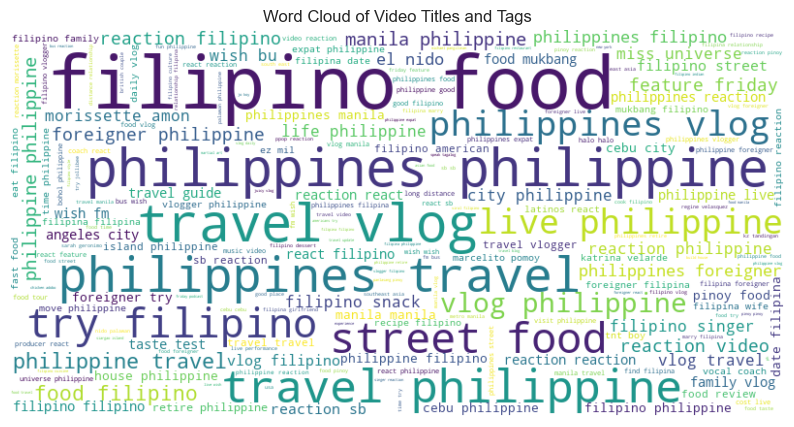

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('pinoybaiting_videos_dataset_clustered.csv')

# Drop rows with NaN values in 'Video Title' and 'Video Tags' columns
df = df.dropna(subset=['Video Title', 'Video Tags'])

# Combine video titles and tags into a single text
text = ' '.join(df['Video Title']) + ' '.join(df['Video Tags'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Video Titles and Tags')
plt.show()

### Preparing Merged Category and Polarity Datasets for Analysis

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

In [88]:
# Categorize 'Video Views' into ranges for easier analysis
bins = [0, 10000, 100000, 500000, 1000000, 5000000, 10000000, 50000000]
labels = ['0-10k', '10k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M']
merged_data['views_category'] = pd.cut(merged_data['Video Views'], bins=bins, labels=labels)
merged_polarity_data['views_category'] = pd.cut(merged_polarity_data['Video Views_y'], bins=bins, labels=labels)

### Distribution by Video Views

IndexError: list index out of range

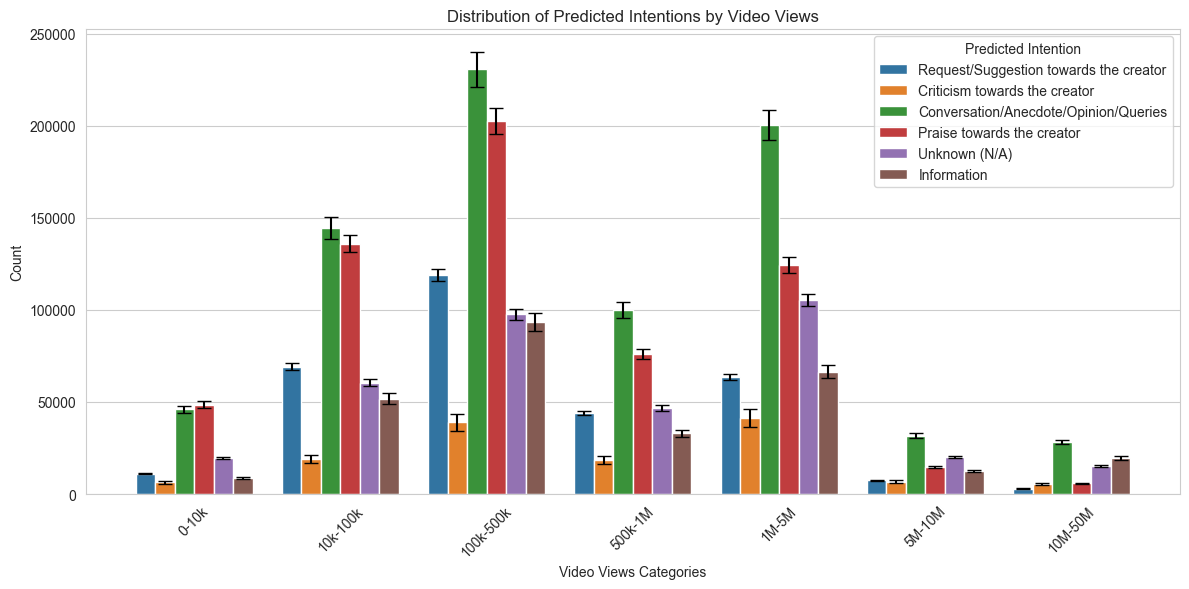

In [89]:
# Assuming 'merged_data' contains the necessary data for plotting
plt.figure(figsize=(12, 6))

# Creating a bar plot and capturing the returned axes object
ax = sns.countplot(data=merged_data, x='views_category', hue='Predicted_Category', order=labels)

# Adding title and labels
plt.title('Distribution of Predicted Intentions by Video Views')
plt.xlabel('Video Views Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Predicted Intention')
plt.tight_layout()

# Defining margins of error for each category (as percentages)
category_margins_of_error = {
    'Conversation/Anecdote/Opinion/Queries': 0.0416,
    'Criticism towards the creator': 0.1195,
    'Information': 0.0532,
    'Praise towards the creator': 0.0353,
    'Request/Suggestion towards the creator': 0.0268,
    'Unknown (N/A)': 0.0322,
}

# We'll use the hue order to correctly align the patches with categories
categories = ax.get_legend_handles_labels()[1]

# Determining the number of view categories
num_view_categories = len(labels)

# Iterating over the patches to add error bars with correct margin of errors
for i, p in enumerate(ax.patches):
    height = p.get_height()
    # Determine the category for the current patch
    category_index = i // num_view_categories
    category = categories[category_index]
    
    # Calculate the absolute error
    error = category_margins_of_error[category] * height
    
    # Adding the error bar, ensuring it's at least min_error_length units long
    plt.errorbar(x=p.get_x() + p.get_width() / 2., y=height, yerr=error, fmt='none', color='black', capsize=5)

plt.show()



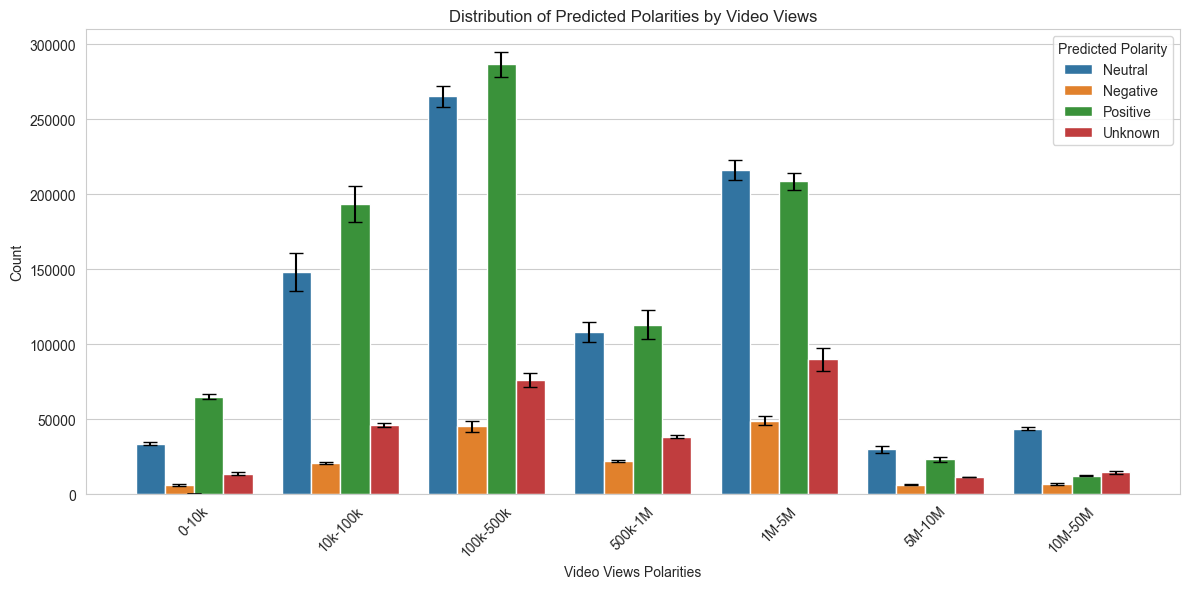

In [93]:
# Visualization 1: Polarity Distribution by Video Views
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=merged_polarity_data, x='views_category', hue='Predicted_Polarity', order=labels)
plt.title('Distribution of Predicted Polarities by Video Views')
plt.xlabel('Video Views Polarities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Predicted Polarity')
plt.tight_layout()

# Define the margins of error for each category
polarity_margins_of_error = {
    'Negative': 0.0848,
    'Neutral': 0.0295,
    'Positive': 0.0274,
    'Unknown': 0.0628,
}

# We'll use the hue order to correctly align the patches with categories
polarities = ax.get_legend_handles_labels()[1]

# Iterating over the patches to add error bars with the correct margin of errors
for i, p in enumerate(ax.patches):
    height = p.get_height()
    # Determine the category for the current patch
    polarity_index = i % len(polarities)
    polarity = polarities[polarity_index]
    
    # Check if the category is in the margins of error dictionary
    if polarity in polarity_margins_of_error:
        # Calculate the absolute error
        error = polarity_margins_of_error[polarity] * height
        
        # Adding the error bar
        plt.errorbar(x=p.get_x() + p.get_width() / 2., y=height, yerr=error, fmt='none', color='black', capsize=5)

plt.show()


In [32]:
# Data from the visualization
data = {
    'Video Views Polarities': merged_polarity_data['views_category'].value_counts().index.tolist(),
    'Negative': merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Negative']['views_category'].value_counts().tolist(),
    'Neutral': merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Neutral']['views_category'].value_counts().tolist(),
    'Positive': merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Positive']['views_category'].value_counts().tolist()
}

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ['Video Views Polarities', 'Negative', 'Neutral', 'Positive']

# Add data to the table
for i in range(len(data['Video Views Polarities'])):
    table.add_row([
        data['Video Views Polarities'][i],
        data['Negative'][i],
        data['Neutral'][i],
        data['Positive'][i]
    ])

# Print the table
print(table)

+------------------------+----------+---------+----------+
| Video Views Polarities | Negative | Neutral | Positive |
+------------------------+----------+---------+----------+
|       100k-500k        |  51454   |  300635 |  342044  |
|         1M-5M          |  51074   |  230826 |  228364  |
|        10k-100k        |  24499   |  174128 |  222463  |
|        500k-1M         |  23908   |  120210 |  131394  |
|         0-10k          |   7833   |  43611  |  77748   |
|         5M-10M         |   6994   |  39065  |  30277   |
|        10M-50M         |   6929   |  37123  |  12161   |
+------------------------+----------+---------+----------+


**Trend Across Video Views**: 
   - The highest counts of comments across all polarities are in the ranges of 100k-500k and 1M-5M views, indicating that videos falling within these view ranges attract a significant amount of engagement and comments.
   - Generally, there is a trend of decreasing comment counts as the video view range increases, with fewer comments for videos in the higher view ranges (5M-10M and 10M-50M).
   - Negative comments seem to be consistently higher in the lower view ranges compared to the higher view ranges, which could suggest that videos with lower views tend to attract more negative feedback.

**Engagement Levels**: The distribution of comments across different polarities provides insights into the sentiment of viewers towards the content. Higher counts of positive comments indicate higher engagement and satisfaction with the content, while higher counts of negative comments may suggest areas for improvement or criticism.

### Distribution by Channel Country

IndexError: list index out of range

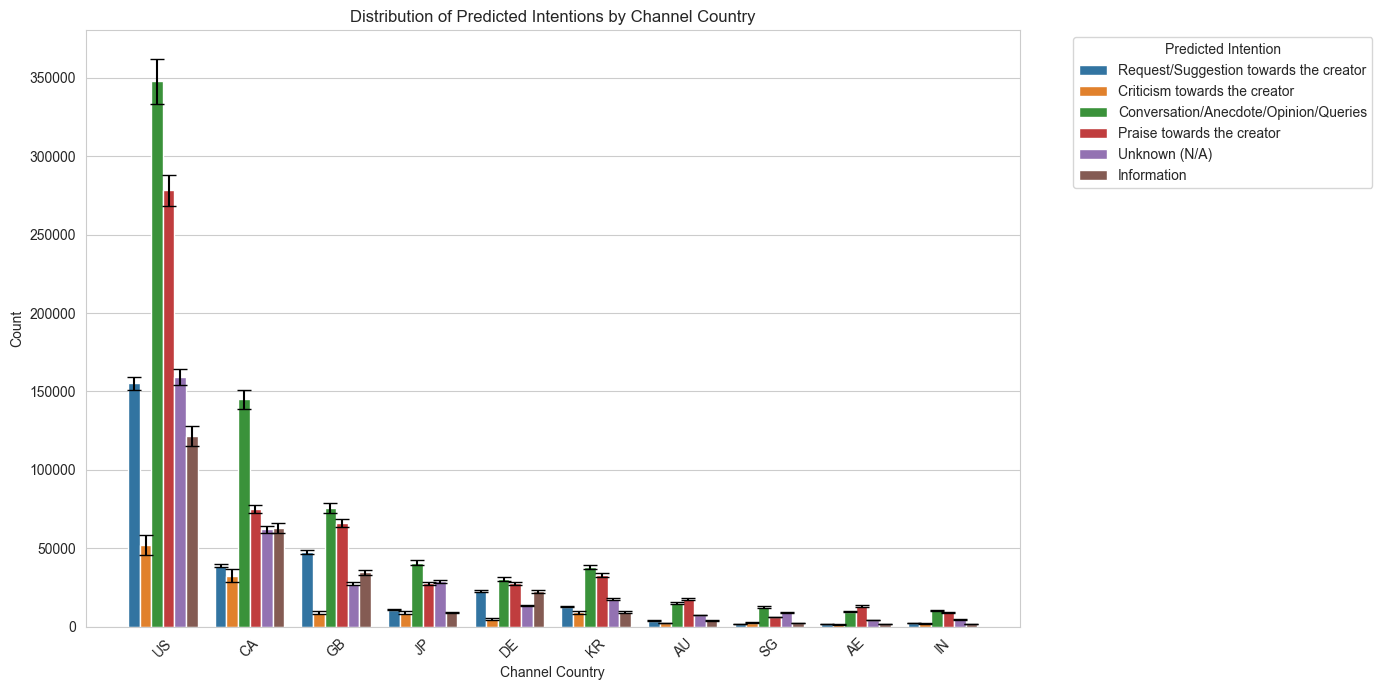

In [99]:
# Determine the top 10 countries for plotting based on their counts
country_order = merged_data['Channel Country'].value_counts().iloc[:10].index

plt.figure(figsize=(14, 7))
# Creating a vertical bar plot for the top 10 countries
ax = sns.countplot(data=merged_data, x='Channel Country', hue='Predicted_Category', order=country_order)

plt.title('Distribution of Predicted Intentions by Channel Country')
plt.ylabel('Count')
plt.xlabel('Channel Country')
plt.xticks(rotation=45)
plt.legend(title='Predicted Intention', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Defining margins of error for each category (as percentages)
category_margins_of_error = {
    'Conversation/Anecdote/Opinion/Queries': 0.0416,
    'Criticism towards the creator': 0.1195,
    'Information': 0.0532,
    'Praise towards the creator': 0.0353,
    'Request/Suggestion towards the creator': 0.0268,
    'Unknown (N/A)': 0.0322,
}

# We'll use the hue order to correctly align the patches with categories
categories = ax.get_legend_handles_labels()[1]

# Determining the number of countries (similar to clusters in the working example)
num_countries = len(country_order)

# Iterating over the patches to add error bars with correct margin of errors
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if pd.isnull(height):  # Skip bars without height
        continue
    
    # Determine the category for the current patch
    category_index = i // num_countries
    category = categories[category_index]
    
    # Calculate the absolute error
    error = category_margins_of_error[category] * height
    
    # Adding the error bar
    plt.errorbar(x=p.get_x() + p.get_width() / 2., y=height, yerr=error, fmt='none', color='black', capsize=5)

plt.show()


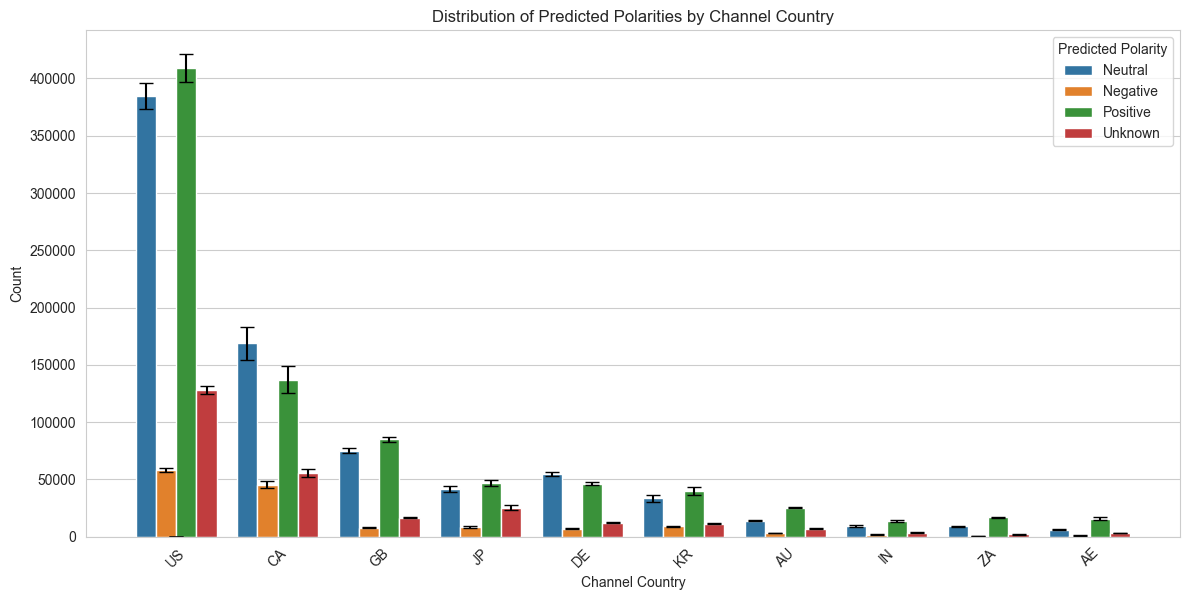

In [105]:
# Visualization 2: Polarity Distribution by Channel Country
plt.figure(figsize=(12, 6))
country_order = merged_polarity_data['Channel Country_y'].value_counts().iloc[:10].index  # Top 10 countries
ax = sns.countplot(data=merged_polarity_data, x='Channel Country_y', hue='Predicted_Polarity', order=country_order)
plt.title('Distribution of Predicted Polarities by Channel Country')
plt.xlabel('Channel Country')
plt.ylabel('Count')
plt.legend(title='Predicted Polarity')
plt.tight_layout()

# Define the margins of error for each polarity
polarity_margins_of_error = {
    'Negative': 0.0848,
    'Neutral': 0.0295,
    'Positive': 0.0274,
    'Unknown': 0.0628,
}

# We'll use the hue order to correctly align the patches with polarity
polarities = ax.get_legend_handles_labels()[1]

# Iterating over the patches to add error bars with the correct margin of errors
for i, p in enumerate(ax.patches):
    height = p.get_height()
    # Determine the polarity for the current patch
    polarity_index = i % len(polarities)
    polarity = polarities[polarity_index]
    
    # Check if the polarity is in the margins of error dictionary
    if polarity in polarity_margins_of_error:
        # Calculate the absolute error
        error = polarity_margins_of_error[polarity] * height
        
        # Adding the error bar
        plt.errorbar(x=p.get_x() + p.get_width() / 2., y=p.get_height(), yerr=error, fmt='none', color='black', capsize=5)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Trends Over Time (Year/Quarter)

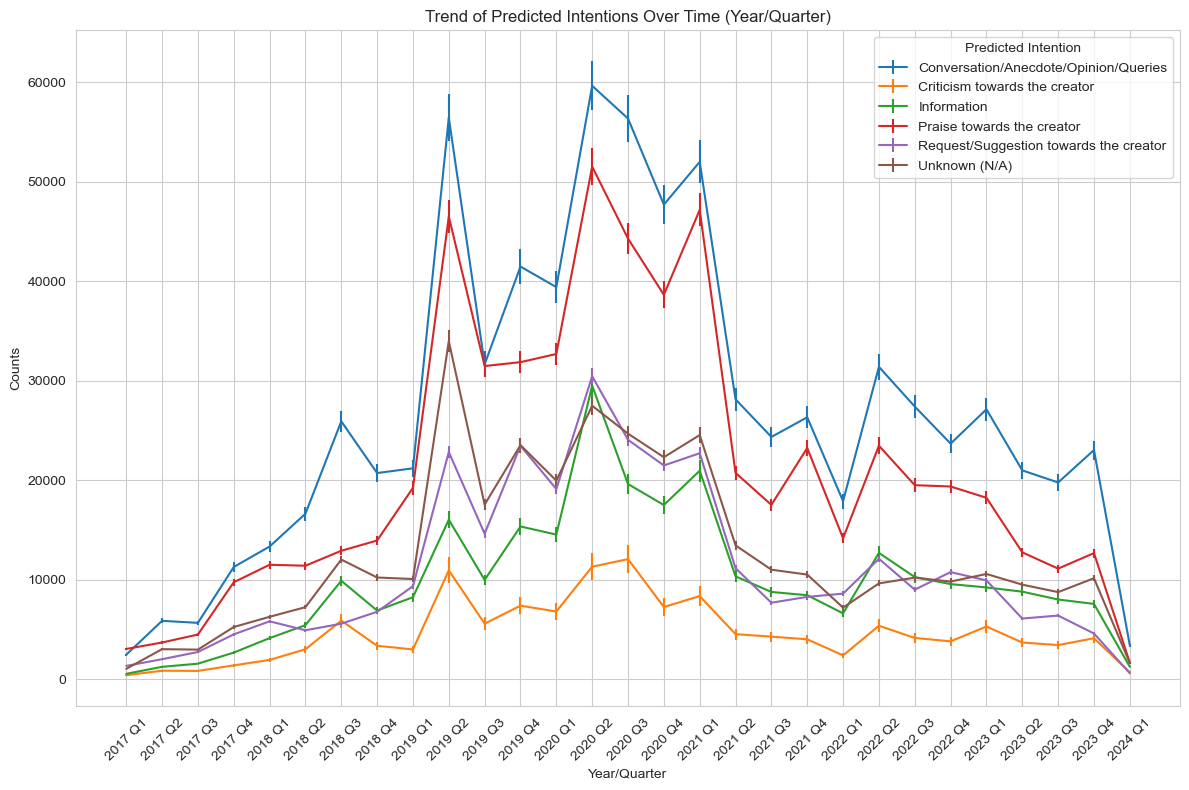

In [28]:
# Visualization 3: Trend Analysis Over Time (Year/Quarter)
time_grouped = merged_data.groupby(['year', 'quarter', 'Predicted_Category'], observed=True).size().reset_index(name='counts')

# Convert year and quarter to int and then to string while creating 'Year-Quarter' column
time_grouped['Year-Quarter'] = time_grouped['year'].astype(int).astype(str) + ' Q' + time_grouped['quarter'].astype(int).astype(str)

# Assuming 'merged_data' and 'time_grouped' are predefined as mentioned
# Defining margins of error for each category (as percentages)
category_margins_of_error = {
    'Conversation/Anecdote/Opinion/Queries': 0.0416,
    'Criticism towards the creator': 0.1195,
    'Information': 0.0532,
    'Praise towards the creator': 0.0353,
    'Request/Suggestion towards the creator': 0.0268,
    'Unknown (N/A)': 0.0322,
}

# Adding a 'margin_of_error' column to 'time_grouped' DataFrame
time_grouped['margin_of_error'] = time_grouped.apply(lambda row: row['counts'] * category_margins_of_error[row['Predicted_Category']], axis=1)

# Setting the figure size
plt.figure(figsize=(12, 8))

# Drawing a line plot with error bars for each category
for category in time_grouped['Predicted_Category'].unique():
    subset = time_grouped[time_grouped['Predicted_Category'] == category]
    plt.errorbar(data=subset, x='Year-Quarter', y='counts', yerr=subset['margin_of_error'], label=category, fmt='-')  # Line without markers

plt.title('Trend of Predicted Intentions Over Time (Year/Quarter)')
plt.xlabel('Year/Quarter')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Predicted Intention')
plt.tight_layout()
plt.show()


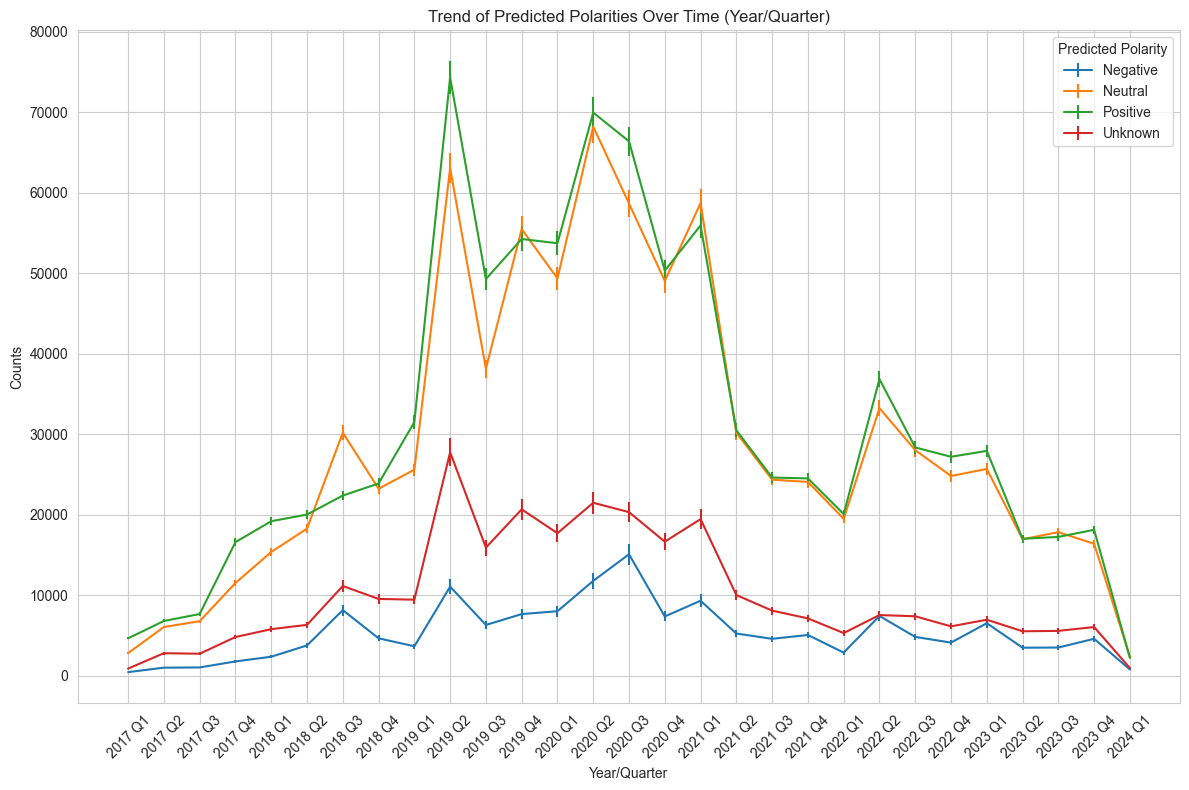

In [108]:
# Visualization 3: Trend Analysis Over Time (Year/Quarter)
time_grouped = merged_polarity_data.groupby(['year', 'quarter', 'Predicted_Polarity'], observed=True).size().reset_index(name='counts')

# Convert year and quarter to int and then to string while creating 'Year-Quarter' column
time_grouped['Year-Quarter'] = time_grouped['year'].astype(int).astype(str) + ' Q' + time_grouped['quarter'].astype(int).astype(str)

# Define margins of error for each polarity (as percentages)
polarity_margins_of_error = {
    'Negative': 0.0848,
    'Neutral': 0.0295,
    'Positive': 0.0274,
    'Unknown': 0.0628,
}

# Adding a 'margin_of_error' column to 'time_grouped' DataFrame
time_grouped['margin_of_error'] = time_grouped.apply(lambda row: row['counts'] * polarity_margins_of_error[row['Predicted_Polarity']], axis=1)

# Setting the figure size and style
plt.figure(figsize=(12, 8))

# Drawing a line plot with error bars for each polarity
for polarity in time_grouped['Predicted_Polarity'].unique():
    subset = time_grouped[time_grouped['Predicted_Polarity'] == polarity]
    plt.errorbar(data=subset, x='Year-Quarter', y='counts', yerr=subset['margin_of_error'], label=polarity, fmt='-')  # Line without markers

plt.title('Trend of Predicted Polarities Over Time (Year/Quarter)')
plt.xlabel('Year/Quarter')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Predicted Polarity')
plt.tight_layout()
plt.show()

### Distribution by Content Theme

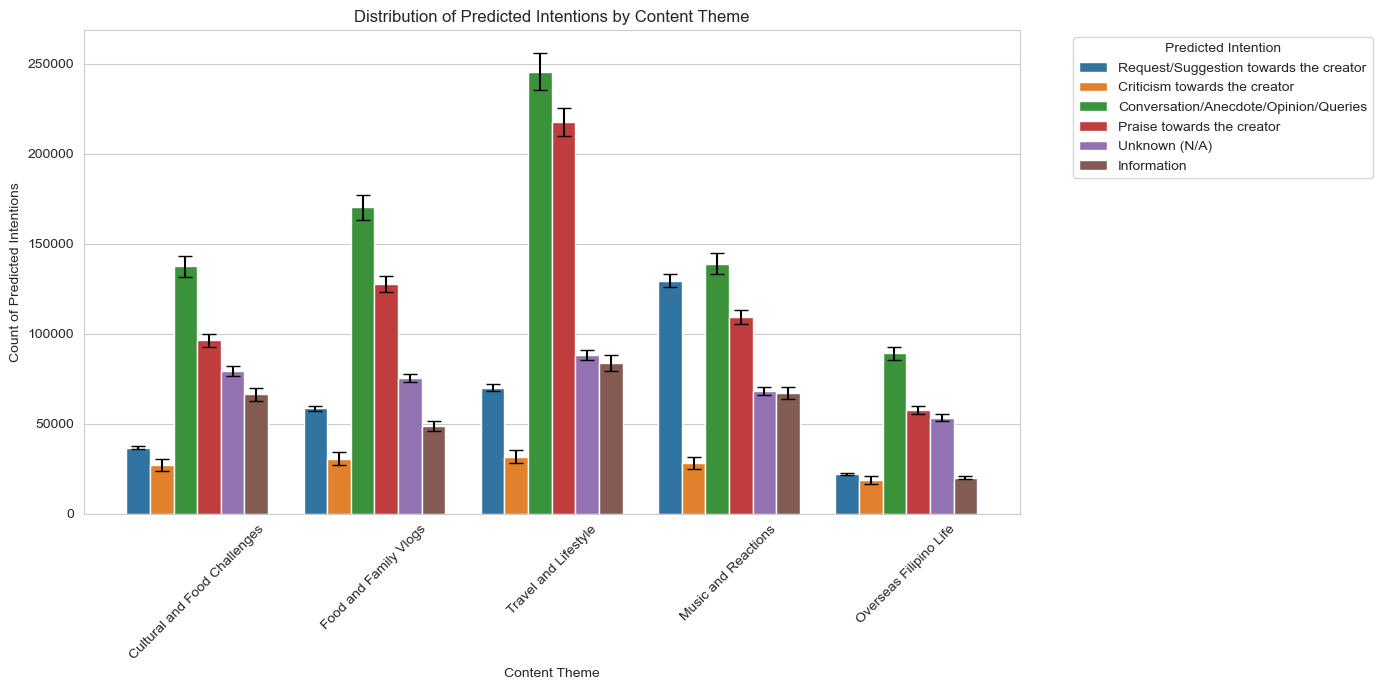

In [52]:
# Define the cluster names and map the original cluster numbers to these names
cluster_names = {
    0: 'Cultural and Food Challenges',
    1: 'Food and Family Vlogs',
    2: 'Travel and Lifestyle',
    3: 'Music and Reactions',
    4: 'Overseas Filipino Life'
}

if 'Original_Cluster' not in merged_data.columns:
    merged_data['Original_Cluster'] = merged_data['Cluster'].copy()

merged_data['Cluster'] = merged_data['Original_Cluster'].map(cluster_names)

# Ensure all cluster names are included in the plot
cluster_order = list(cluster_names.values())

plt.figure(figsize=(14, 7))
ax = sns.countplot(data=merged_data, x='Cluster', hue='Predicted_Category', order=cluster_order)

plt.title('Distribution of Predicted Intentions by Content Theme')
plt.xlabel('Content Theme')
plt.ylabel('Count of Predicted Intentions')
plt.xticks(rotation=45)
plt.legend(title='Predicted Intention', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Defining margins of error for each category (as percentages)
category_margins_of_error = {
    'Conversation/Anecdote/Opinion/Queries': 0.0416,
    'Criticism towards the creator': 0.1195,
    'Information': 0.0532,
    'Praise towards the creator': 0.0353,
    'Request/Suggestion towards the creator': 0.0268,
    'Unknown (N/A)': 0.0322,
}

# We'll use the hue order to correctly align the patches with categories
categories = ax.get_legend_handles_labels()[1]

# Determining the number of clusters
num_clusters = len(cluster_order)

# Iterating over the patches to add error bars with correct margin of errors
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if pd.isnull(height):  # Skip bars without height
        continue
    
    # Determine the category for the current patch
    category_index = i // num_clusters
    category = categories[category_index]
    
    # Calculate the absolute error
    error = category_margins_of_error[category] * height
    
    # Adding the error bar
    plt.errorbar(x=p.get_x() + p.get_width() / 2., y=height, yerr=error, fmt='none', color='black', capsize=5)

plt.show()


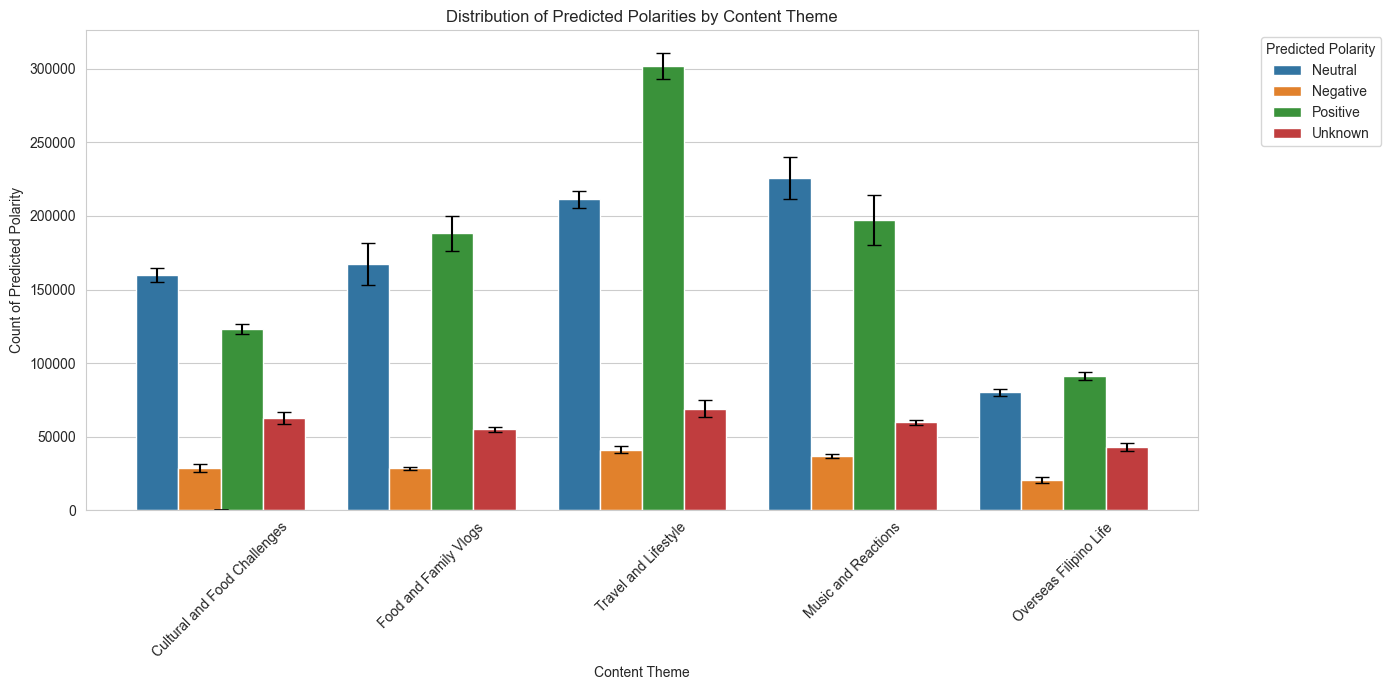

In [112]:
# Define the cluster names and map the original cluster numbers to these names
cluster_names = {
    0: 'Cultural and Food Challenges',
    1: 'Food and Family Vlogs',
    2: 'Travel and Lifestyle',
    3: 'Music and Reactions',
    4: 'Overseas Filipino Life'
}

if 'Original_Cluster' not in merged_polarity_data.columns:
    merged_polarity_data['Original_Cluster'] = merged_polarity_data['Cluster'].copy()

merged_polarity_data['Cluster'] = merged_polarity_data['Original_Cluster'].map(cluster_names)

# Ensure all cluster names are included in the plot
cluster_order = list(cluster_names.values())

plt.figure(figsize=(14, 7))
ax = sns.countplot(data=merged_polarity_data, x='Cluster', hue='Predicted_Polarity', order=cluster_order)

plt.title('Distribution of Predicted Polarities by Content Theme')
plt.xlabel('Content Theme')
plt.ylabel('Count of Predicted Polarity')
plt.xticks(rotation=45)
plt.legend(title='Predicted Polarity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Define the margins of error for each polarity
polarity_margins_of_error = {
    'Negative': 0.0848,
    'Neutral': 0.0295,
    'Positive': 0.0274,
    'Unknown': 0.0628,
}

# We'll use the hue order to correctly align the patches with polarity
polarities = ax.get_legend_handles_labels()[1]

# Determining the number of clusters
num_clusters = len(cluster_order)

# Iterating over the patches to add error bars with correct margin of errors
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if pd.isnull(height):  # Skip bars without height
        continue
    
    # Determine the polarity for the current patch
    polarity_index = i % len(polarities)
    polarity = polarities[polarity_index]
    
    # Check if the polarity is in the margins of error dictionary
    if polarity in polarity_margins_of_error:
        # Calculate the absolute error
        error = polarity_margins_of_error[polarity] * height
        
        # Adding the error bar
        plt.errorbar(x=p.get_x() + p.get_width() / 2., y=height, yerr=error, fmt='none', color='black', capsize=5)

plt.show()

### Word Cloud for Comments that Praise the Creator

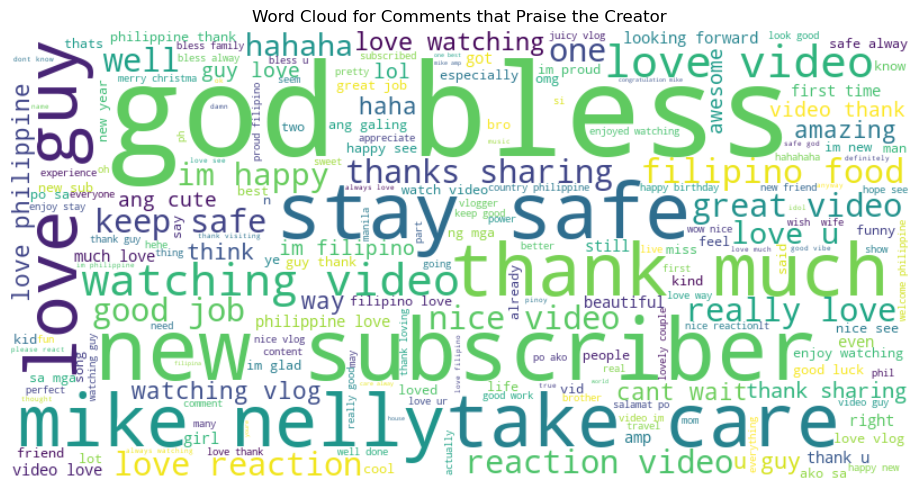

In [6]:
from wordcloud import WordCloud

praise_comments = merged_data[merged_data['Predicted_Category'] == 'Praise towards the creator']['clean_comment'].dropna()
praise_text = ' '.join(praise_comments)
praise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(praise_text)

plt.figure(figsize=(10, 5))
plt.imshow(praise_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Comments that Praise the Creator')
plt.axis('off')
plt.tight_layout()
plt.show()

### Word Cloud for Comments that Criticize the Creator

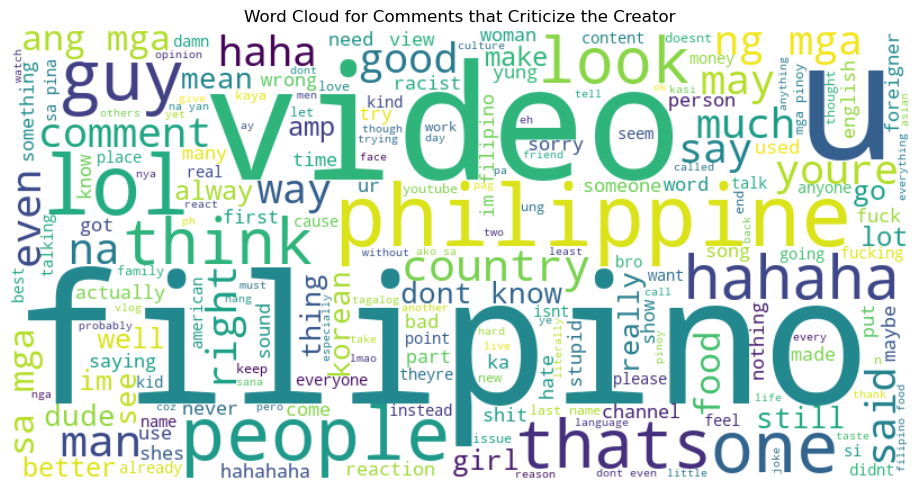

In [5]:
from wordcloud import WordCloud

criticism_comments = merged_data[merged_data['Predicted_Category'] == 'Criticism towards the creator']['clean_comment'].dropna()
criticism_text = ' '.join(criticism_comments)
criticism_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(criticism_text)

plt.figure(figsize=(10, 5))
plt.imshow(criticism_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Comments that Criticize the Creator')
plt.axis('off')
plt.tight_layout()
plt.show()

### Deeper Polarity Analysis

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Common Words in Positive and Negative Comments

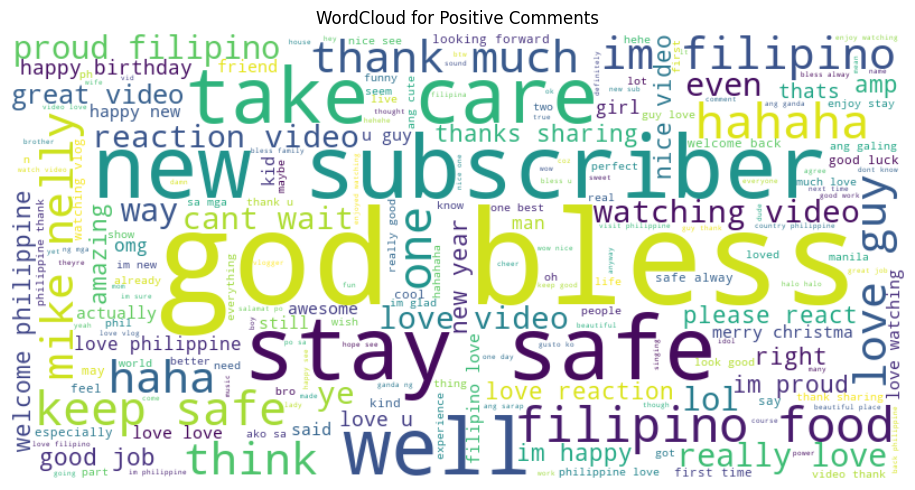

In [22]:
# Textual Analysis: Common Words in Positive and Negative Comments
from wordcloud import WordCloud

# Generate WordCloud for Positive Comments
positive_comments = merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Positive']['clean_comment'].dropna()
positive_text = ' '.join(positive_comments)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Positive Comments')
plt.axis('off')
plt.tight_layout()
plt.show()

In [93]:
# Print number of positive comments
positive_comments.shape[0]

1044451

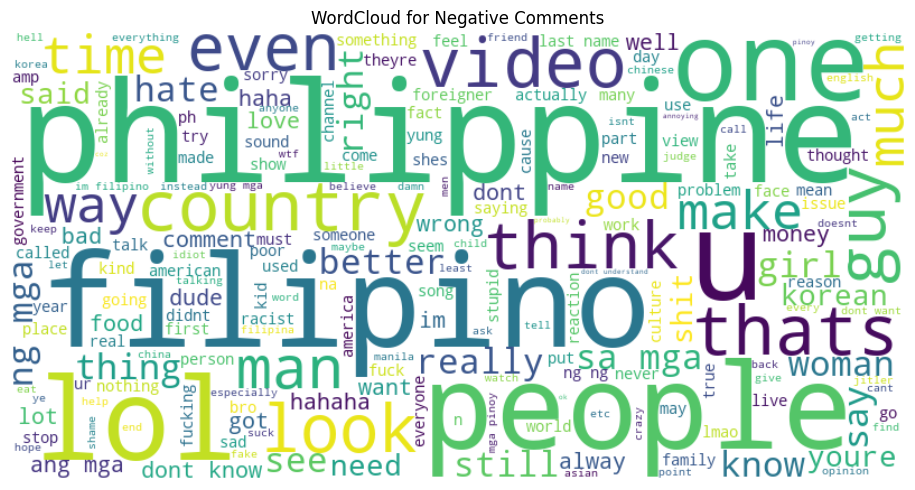

In [23]:
# Generate WordCloud for Negative Comments
negative_comments = merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Negative']['clean_comment'].dropna()
negative_text = ' '.join(negative_comments)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Negative Comments')
plt.axis('off')
plt.tight_layout()
plt.show()

In [94]:
# Print number of negative comments
negative_comments.shape[0]

172691

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top negative comments
negative_comments_df = merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Negative']
top_negative_comments = negative_comments_df['clean_comment'].value_counts().nlargest(50)
top_negative_comments.head(5)

clean_comment
cringe              128
pinoy baiting        88
disgusting           56
filipino baiting     53
get                  51
Name: count, dtype: int64

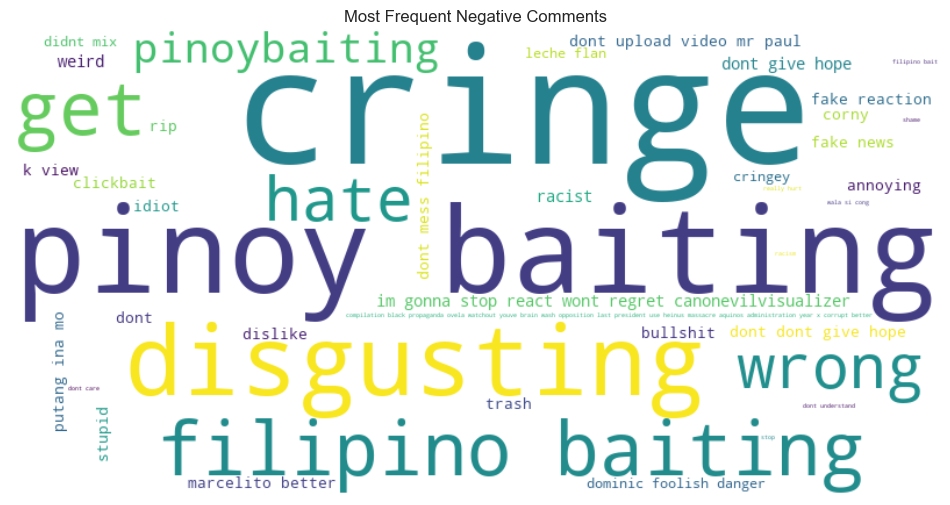

In [113]:
# Create a dictionary of comments and their frequencies
comment_freq = {}
for comment, freq in top_negative_comments.items():
    comment_freq[comment] = freq

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(comment_freq)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Negative Comments')
plt.axis('off')
plt.show()

In [118]:
# Get the top negative comments
top_negative_comments = negative_comments_df['clean_comment'].value_counts().nlargest(50)

# Create a dictionary of comments and their frequencies
comment_freq = {}
for comment, freq in top_negative_comments.items():
    comment_freq[comment] = freq

# Display the results
for comment, freq in comment_freq.items():
    print(f"Comment: {comment} | Frequency: {freq}")


Comment: cringe | Frequency: 128
Comment: pinoy baiting | Frequency: 88
Comment: disgusting | Frequency: 56
Comment: filipino baiting | Frequency: 53
Comment: get | Frequency: 51
Comment: hate | Frequency: 35
Comment: wrong | Frequency: 35
Comment: pinoybaiting | Frequency: 34
Comment: im gonna stop react wont regret canonevilvisualizer | Frequency: 33
Comment: weird | Frequency: 32
Comment: racist | Frequency: 32
Comment: dont give hope | Frequency: 32
Comment: dont upload video mr paul | Frequency: 29
Comment: fake news | Frequency: 28
Comment: annoying | Frequency: 27
Comment: stupid | Frequency: 26
Comment: k view | Frequency: 26
Comment: dont mess filipino | Frequency: 26
Comment: trash | Frequency: 26
Comment: dislike | Frequency: 26
Comment: idiot | Frequency: 25
Comment: dont dont give hope | Frequency: 24
Comment: dont | Frequency: 24
Comment: bullshit | Frequency: 23
Comment: marcelito better | Frequency: 22
Comment: clickbait | Frequency: 22
Comment: corny | Frequency: 21
Co

Get top 200 words from negative comments

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

# Filter negative comments
negative_comments = merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Negative']['clean_comment']

# Initialize CountVectorizer to convert comments into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the negative comments
comment_matrix = vectorizer.fit_transform(negative_comments)

# Get the list of words
words = vectorizer.get_feature_names_out()

# Sum up the counts of each word across all comments
word_counts = comment_matrix.sum(axis=0)

# Create a dictionary to store word frequencies
word_freq = {word: word_counts[0, idx] for word, idx in vectorizer.vocabulary_.items()}

# Sort the words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Retrieve the top 100 most frequent words
top_100_words = sorted_words[:200]

# Display the top 100 words
for idx, (word, freq) in enumerate(top_100_words, start=1):
    print(f"{idx}. {word}: {freq}")

1. like: 23525
2. dont: 23072
3. sa: 23016
4. na: 22110
5. filipino: 21844
6. ng: 18854
7. philippine: 18818
8. people: 18660
9. mga: 17419
10. ang: 16901
11. im: 12272
12. video: 12224
13. country: 12201
14. know: 10570
15. guy: 9791
16. mo: 9218
17. think: 8229
18. thats: 8116
19. look: 7864
20. lol: 7482
21. make: 7394
22. want: 7091
23. time: 6657
24. really: 6619
25. yung: 6282
26. hate: 6139
27. korean: 6001
28. thing: 5446
29. ka: 5415
30. say: 5411
31. man: 5224
32. good: 5143
33. need: 5128
34. bad: 5121
35. money: 5038
36. youre: 4956
37. food: 4937
38. wrong: 4915
39. way: 4861
40. yan: 4828
41. lang: 4671
42. better: 4553
43. stop: 4499
44. doesnt: 4398
45. love: 4320
46. ko: 4265
47. didnt: 4181
48. pa: 4172
49. girl: 4081
50. po: 4074
51. woman: 4020
52. hindi: 4015
53. pinoy: 3985
54. si: 3939
55. lot: 3889
56. got: 3771
57. comment: 3728
58. kung: 3721
59. world: 3709
60. right: 3656
61. english: 3606
62. naman: 3587
63. sad: 3460
64. life: 3432
65. marcos: 3415
66. fee

Count instances of pinoy bait / click bait - related words from negative comments

In [86]:
# Define the list of words to count
words_to_count = ["pinoybaiting", "bait", "clickbait", "baiting"]

# Initialize counts for each word
word_counts = {word: 0 for word in words_to_count}

# Iterate through each negative comment
for comment in merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Negative']['clean_comment']:
    # Tokenize the comment into individual words
    words = comment.split()
    # Check if any specified word is present in the tokenized words
    for word in words_to_count:
        # If the word is found, increment its count
        if word in words:
            word_counts[word] += 1

# Print the counts for each word
for word, count in word_counts.items():
    print(f"{word}: {count}")

pinoybaiting: 137
bait: 444
clickbait: 231
baiting: 558


Create stopword list based on top 200 words. Retrieve top 100 words to potentially use as keywords in clustering the intent of negative comments.

*Intent of the comment isn't part of the annotated dataset.*

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

# Define the common stop words
common_stop_words = text.ENGLISH_STOP_WORDS

# Additional stop words based on the top 200 words from the negative comments
additional_stop_words = [
    'like', 'dont', 'know', 'im', 'thats', 'think', 'look', 'lol', 'make', 'want', 'time', 'really', 'way', 'better', 'stop', 'didnt', 
    'love', 'lot', 'got', 'comment', 'right', 'english', 'dude', 'use', 'live', 'hahaha', 'come', 'person', 'speak', 'word', 'parang', 'day',
    'sa', 'na', 'ng', 'people', 'ang', 'mga', 'mo', 'guy', 'yung', 'thing', 'ka', 'man', 'youre', 'yan', 'lang', 'doesnt', 'ko', 'pa', 'si',
    'girl', 'boy', 'si', 'naman', 'di', 'ako', 'nila', 'sila', 'said', 'saying', 'pag', 'para', 'din', 'haha' 'lng', 'kaya', 'ba', 'nag', 'woman',
    'po', 'try', 'shes', 'hes', 'nyo', 'ay', 'ni', 'japanese', 'korean', 'bro', 'kind', 'eat', 'actually', 'theyre', 'ur', 'sana', 'nga', 'men'
]

# Combine both common and additional stop words
stop_words = list(common_stop_words.union(additional_stop_words))

# Filter negative comments
negative_comments = merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Negative']['clean_comment']

# Initialize CountVectorizer with customized stop words
vectorizer = CountVectorizer(stop_words=stop_words)

# Fit and transform the negative comments
comment_matrix = vectorizer.fit_transform(negative_comments)

# Get the list of words
words = vectorizer.get_feature_names_out()

# Sum up the counts of each word across all comments
word_counts = comment_matrix.sum(axis=0)

# Create a dictionary to store word frequencies
word_freq = {word: word_counts[0, idx] for word, idx in vectorizer.vocabulary_.items()}

# Sort the words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Filter out stop words and retrieve the top 100 most frequent words
top_100_words = [(word, freq) for word, freq in sorted_words if word not in stop_words][:100]

# Display the top 100 words
for idx, (word, freq) in enumerate(top_100_words, start=1):
    print(f"{idx}. {word}: {freq}")


1. filipino: 21844
2. philippine: 18818
3. video: 12224
4. country: 12201
5. hate: 6139
6. say: 5411
7. good: 5143
8. need: 5128
9. bad: 5121
10. money: 5038
11. food: 4937
12. wrong: 4915
13. hindi: 4015
14. pinoy: 3985
15. kung: 3721
16. world: 3709
17. sad: 3460
18. life: 3432
19. marcos: 3415
20. feel: 3368
21. shit: 3261
22. poor: 3178
23. understand: 3138
24. foreigner: 3133
25. year: 3103
26. language: 3055
27. korea: 3050
28. asian: 2996
29. flag: 2879
30. sorry: 2873
31. president: 2856
32. american: 2766
33. white: 2739
34. view: 2701
35. going: 2632
36. mean: 2575
37. kid: 2541
38. reaction: 2539
39. talk: 2534
40. stupid: 2523
41. racist: 2471
42. song: 2443
43. wala: 2438
44. lng: 2428
45. real: 2396
46. family: 2396
47. sound: 2391
48. immigration: 2384
49. watch: 2360
50. government: 2336
51. haha: 2320
52. place: 2299
53. watching: 2296
54. walang: 2295
55. fake: 2285
56. black: 2238
57. ive: 2228
58. true: 2183
59. culture: 2173
60. problem: 2142
61. reason: 2137
62. h

### Clustering Negative Comments based on Intent (using keywords)

In [88]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sample keywords or phrases for each category
category_keywords = {
    'Content Criticism': ['criticize', 'criticism', 'issues', 'flaws', 'problem', 'wrong', 'sad', 'poor', 'immigration', 'problem', 'reason', 'history', 'fact', 'fake', 'marcos'],
    'Creator Criticism': ['creator', 'uploader', 'author', 'video maker', 'view', 'watch', 'watching', 'channel', 'fake', 'bad'],
    'Hate Speech': ['hate', 'crazy', 'stupid', 'racist', 'fuck'],
    'Pinoy/Click Baiting': ['using', 'view', 'views', 'money', 'filipino', 'pinoybaiting', 'bait', 'clickbait', 'baiting']
}

# Function to assign category based on keywords
def assign_category(comment):
    # Tokenize, remove stopwords, and lemmatize the comment
    tokens = word_tokenize(comment.lower())
    filtered_tokens = [word for word in tokens if word not in common_stop_words] 
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Check presence of keywords in the comment
    category_scores = {category: 0 for category in category_keywords.keys()}
    for category, keywords in category_keywords.items():
        for keyword in keywords:
            if keyword in lemmatized_tokens:
                category_scores[category] += 1
    
    # Assign comment to the category with the highest score
    assigned_category = max(category_scores, key=category_scores.get)
    return assigned_category

# Filter negative comments
negative_comments = merged_polarity_data[merged_polarity_data['Predicted_Polarity'] == 'Negative']

# Apply intent-based sentiment analysis to negative comments
intent_categories = negative_comments['clean_comment'].apply(assign_category)

# Create a new DataFrame with negative comments and intent categories
negative_comments_df = pd.concat([negative_comments, intent_categories.rename('Intent Category')], axis=1)


In [89]:
negative_comments_df.head(5)

,videoId,videoTitle,author,authorId,comment,datePublished,replies,likeCount,channelId_x,clean_comment,...,Video Likes_y,Favorite Count_y,Comment Count_y,Channel Country_y,Query_y,Combined Text,Cluster,views_category,Original_Cluster,Intent Category
1,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@lownleinhigh,UCL3x8yLGI9C2MWffUcVEOXw,Too time consuming to watch before the main co...,2023-06-16 15:30:25+00:00,"[{'replyAuthorId': 'UCcAlddFK69e8eAwur1igeVQ',...",0.0,UCcAlddFK69e8eAwur1igeVQ,time consuming watch main content shown waste ...,...,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,Overseas Filipino Life,100k-500k,4,Creator Criticism
71,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@ray2518,UCJh4cP8N8rhX11FrWlp6RpQ,After watching all your Morocco videos. Everyt...,2019-05-31 00:26:34+00:00,"[{'replyAuthorId': 'UCcAlddFK69e8eAwur1igeVQ',...",0.0,UCcAlddFK69e8eAwur1igeVQ,watching morocco video everytime see different...,...,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,Overseas Filipino Life,100k-500k,4,Creator Criticism
178,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@nancygarcia6757,UCQztIv09KkgdW4wey1d9F7A,This man try to interact you he likes himself ...,2018-10-31 21:59:04+00:00,"[{'replyAuthorId': 'UCcAlddFK69e8eAwur1igeVQ',...",0.0,UCcAlddFK69e8eAwur1igeVQ,man try interact like show camera go away man,...,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,Overseas Filipino Life,100k-500k,4,Content Criticism
219,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@romnickbuyoc2853,UC9081K7-NtzBgs1MCexKIgA,I CALL YOU .. UBE GIRL,2018-09-07 05:06:19+00:00,[],0.0,UCcAlddFK69e8eAwur1igeVQ,call ube girl,...,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,Overseas Filipino Life,100k-500k,4,Content Criticism
249,nNUGM4ilQcM,WHOLE FAMILY TRIED UBE CAKE ON THANKSGIVING + ...,@clarkbarcelo4694,UCf39TxNwtE_HwD_Zy5XVMTg,Have u tried eating durian? Coz if u haven&#39...,2018-08-03 13:55:28+00:00,"[{'replyAuthorId': 'UCcAlddFK69e8eAwur1igeVQ',...",0.0,UCcAlddFK69e8eAwur1igeVQ,u tried eating durian coz u havent dare u,...,8492,0,1446,US,"American React Filipino,Foreigner React Filipi...",layne fable laynabayna short sweet care layne ...,Overseas Filipino Life,100k-500k,4,Content Criticism


In [90]:
# Display the distribution of comments in each category
print(negative_comments_df['Intent Category'].value_counts())

Intent Category
Content Criticism      137075
Pinoy/Click Baiting     15068
Hate Speech             10546
Creator Criticism       10002
Name: count, dtype: int64


In [96]:
# Group the negative comments by intent category
grouped_comments = negative_comments_df.groupby('Intent Category')

# Print around 5 random comments from each intent category
for category, group in grouped_comments:
    print(f"Intent Category: {category}\n")
    random_comments = group.sample(min(5, len(group)))['comment']
    for idx, comment in enumerate(random_comments, start=1):
        print(f"{idx}. {comment}\n")


Intent Category: Content Criticism

1. Simple incompetence on the part of Bureau of Immigration. So-called &quot;Pininoy&quot; standard of quality.

2. kaya pa ba kuya? hahah makakarma din yang panget na yan

3. As someone from the Philippines, it is Sad to think that a white guy (i guess) put more work and effort to explain the history of the country in 12 mins than the whole education system of the country teaching history to children. Education here is so bad that people barely even remember their history subjects. When i was in elementary, i could tell that they sre teaching what information is from decades ago, very outdated. Average People will get surprised if they would go research the history of the country on the internet today. they be wandering why these were never taught to them in elementary. Some would say its fake or something.

4. MGA GUAPA JUD NING MGA TAGA CEBU BAH👍👍🤗

5. Flan is disgusting, sorry

Intent Category: Creator Criticism

1. This has nothing to do with Is

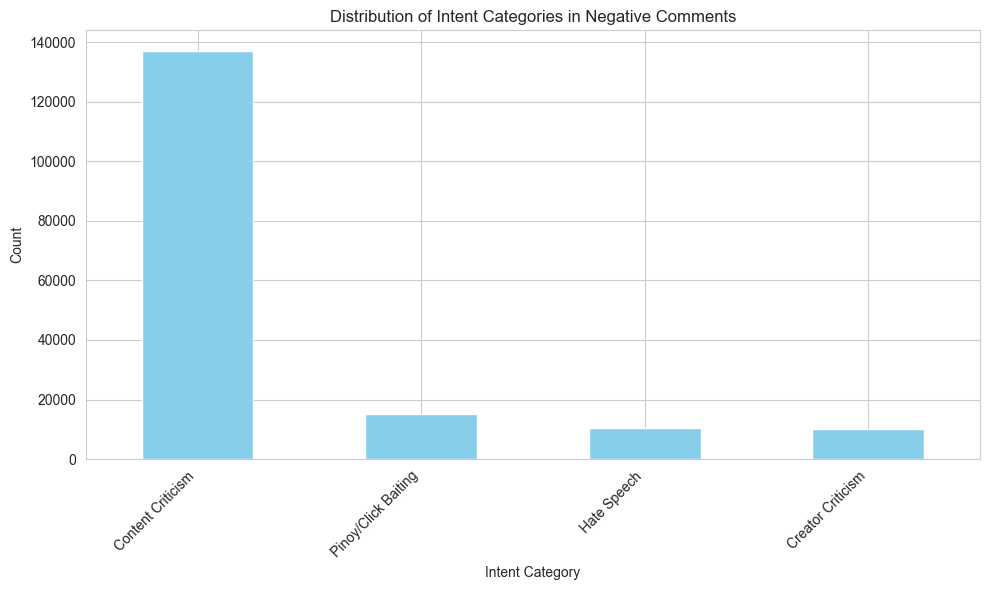

In [97]:
# Get the value counts of each intent category
intent_counts = negative_comments_df['Intent Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
intent_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Intent Categories in Negative Comments')
plt.xlabel('Intent Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


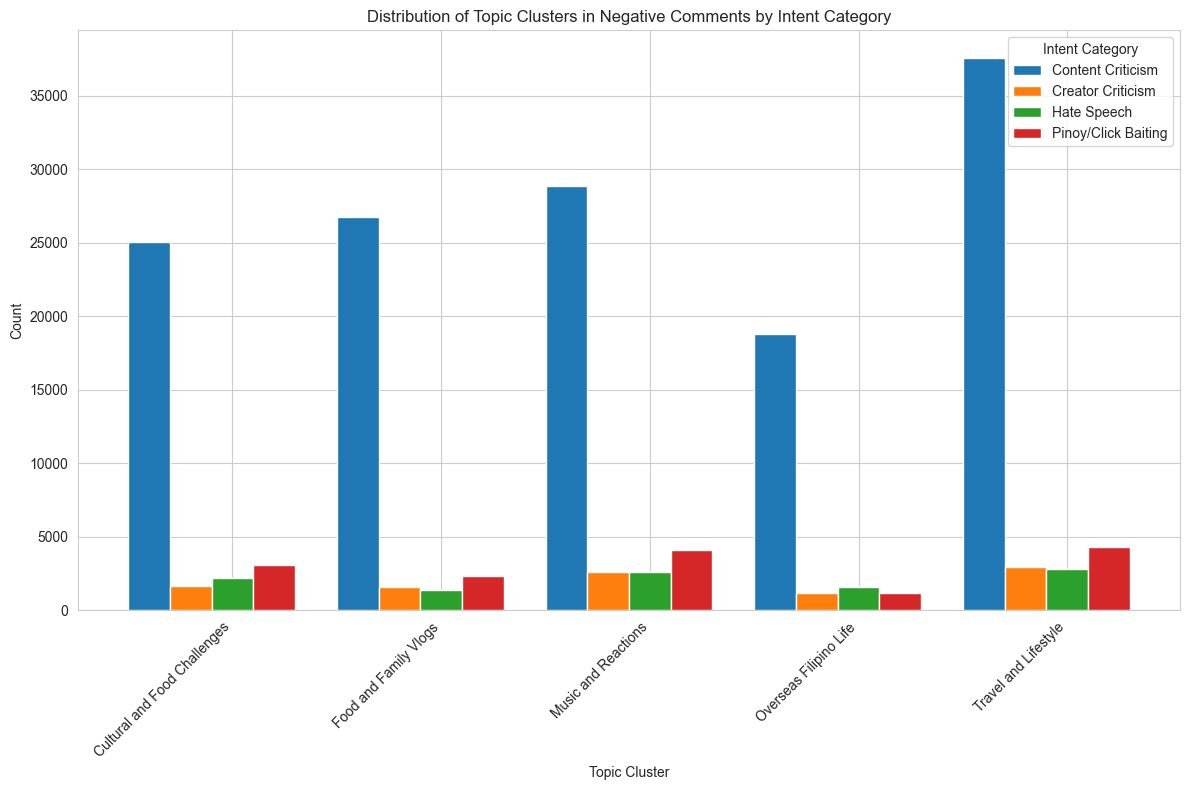

In [103]:
# Group the data by the 'Cluster' and 'Intent Category' columns and calculate value counts
intent_category_distribution = negative_comments_df.groupby(['Cluster', 'Intent Category']).size().unstack(fill_value=0)

# Plot the distribution for all clusters
plt.figure(figsize=(12, 8))
width = 0.2  # Width of each bar
num_clusters = len(intent_category_distribution)

# Iterate over each intent category and plot the bars for each topic cluster
for i, (intent_category, data) in enumerate(intent_category_distribution.items()):
    x = np.arange(len(data)) + (i - (len(intent_category_distribution) - 1) / 2) * width
    plt.bar(x, data, width=width, label=intent_category)

plt.title('Distribution of Topic Clusters in Negative Comments by Intent Category')
plt.xlabel('Topic Cluster')
plt.ylabel('Count')
plt.xticks(np.arange(len(intent_category_distribution.index)), intent_category_distribution.index, rotation=45, ha='right')
plt.legend(title='Intent Category')
plt.tight_layout()
plt.show()
